[[1]](#ref_links)

# Wrangle and Analyze Data

### by: Reem Mandour

## Overview:

[WeRateDogs](https://twitter.com/dog_rates?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) is a twitter account that rates people's dogs with humerous comments about dogs. People from all over the world send different dog pictures via direct message to the account. The account rates them. The ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "[they're good dogs Brent.](https://knowyourmeme.com/memes/theyre-good-dogs-brent)". <img src="weratedogstwitter.jpg" alt="Twitter Page" title="WeRateDogs Twitter page" /><br>In this project, the data of dog's tweets from different sources must be gathered, assessed and cleaned to have it functional. The wrangled data is then stored to CSV file, and prepared to showcase conclusions through analyses and visualizations. [Data wrangling](https://en.wikipedia.org/wiki/Data_wrangling) is the process of gathering, assessing and cleaning data, to have it ready for a variety of downstream purposes such as analytics.

Import necessary packages:

In [1]:
import requests
import json
import tweepy
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

[[2]](#ref_links)

In [2]:
# To make Tab completion work in jupyter notebook.
# %config Completer.use_jedi = False

In [3]:
# Display columns and rows fully with no collapse
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Gather Data:

Dog's tweet data is gathered from three different sources:<br> 
* WeRateDogs Twitter archive: file [downloaded](https://help.twitter.com/en/managing-your-account/how-to-download-your-twitter-archive) by WeRateDogs account and sent to udacity via email for students to use in project. It is attached with project resources.
* Tweet image predictions: i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers.
* Tweet json: Additional data taken from twitter server like retweet count and favorite count.<br><br>
#### We will go through gathering of each file below:

* <b>WeRateDogs Twitter archive</b> is a CSV file provided with the project resources. It contains the basic data for dogs. It is loaded simply with the pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function to a dataframe. [[3]](#ref_links)

In [4]:
df_basic_tweet_data = pd.read_csv('twitter_archive_enhanced.csv')

In [5]:
df_basic_tweet_data.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
df_basic_tweet_data.tail(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


* <b>Image Prediction File</b>: every image in the WeRateDogs Twitter archive ran through a neural network that can classify breeds of dogs. The results are a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images). It is loaded from udacity servers using python [request](https://pypi.org/project/requests/) library and saved to [TSV file](https://en.wikipedia.org/wiki/Tab-separated_values).[[4]](#ref_links)

In [7]:
#get image predictions for each tweet from URL programatically
Img_pred_data = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
print(Img_pred_data.status_code)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(Img_pred_data.content)

200


Image Prediction Downloaded and saved successfully to [TSV file](https://en.wikipedia.org/wiki/Tab-separated_values).
It is time to load TSV file to dataframe using read_csv function, but specifying sep parameter to '\t', to ensure data is separated in rows and columns correctly.[[5]](#ref_links)

In [8]:
df_tweet_img_pred = pd.read_csv('image_predictions.tsv', sep='\t')

In [9]:
df_tweet_img_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [10]:
df_tweet_img_pred.tail(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


* <b>tweet_json.txt</b>: to get the retweet_count and favourite_count besides any additional needed data. We need to get data from twitter. To achieve retrieving data, we need access to twitter api to query for each tweet's JSON data using tweet_ids in WeRateDogs Twitter archive. We query the twitter API for each tweet JSON data using Python's [Tweepy](https://www.tweepy.org/) library. The Twitter API requires users to be authorized to use it. This means that before you can run your API querying code, you need to set up your own Twitter application. [[6]](#ref_links)

In [11]:
# API Keys, secrets, and tokens to connect to Twitter API.
# Hidden to comply with Twitter API terms and conditions.

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

# ---------------------------


tweet_ids = df_basic_tweet_data.tweet_id.values
print('Requesting {} tweets....:\n'.format(len(tweet_ids)))
tweets_info = []
tweet_errors = []
# record start time of api process to retrieve ids
start = timer()
for t_id in tweet_ids:
    try:
        # get each tweet id info
        each_tweet_info = api.get_status(t_id, tweet_mode = 'extended')
        # append each tweet info to list in order
        tweets_info.append(each_tweet_info)
        
    # in case tweet_id is not found, enter exception state
    except tweepy.TweepError as tweeterror:
        # append tweet ids not found to error list
        tweet_errors.append(t_id)
        # print id for viewing purpose
        print('tweet_id {} Error! Failed to get request token.\n'.format(t_id))
        pass
# record end time of api process to retrieve ids
end = timer()
print('Time Taken: {}\n'.format(end-start))

Requesting 2356 tweets....:

tweet_id 888202515573088257 Error! Failed to get request token.

tweet_id 873697596434513921 Error! Failed to get request token.

tweet_id 872668790621863937 Error! Failed to get request token.

tweet_id 872261713294495745 Error! Failed to get request token.

tweet_id 869988702071779329 Error! Failed to get request token.

tweet_id 866816280283807744 Error! Failed to get request token.

tweet_id 861769973181624320 Error! Failed to get request token.

tweet_id 856602993587888130 Error! Failed to get request token.

tweet_id 851953902622658560 Error! Failed to get request token.

tweet_id 845459076796616705 Error! Failed to get request token.

tweet_id 844704788403113984 Error! Failed to get request token.

tweet_id 842892208864923648 Error! Failed to get request token.

tweet_id 837366284874571778 Error! Failed to get request token.

tweet_id 837012587749474308 Error! Failed to get request token.

tweet_id 829374341691346946 Error! Failed to get request toke

Rate limit reached. Sleeping for: 503


tweet_id 754011816964026368 Error! Failed to get request token.

tweet_id 680055455951884288 Error! Failed to get request token.



Rate limit reached. Sleeping for: 497


Time Taken: 2055.957627133141



In [12]:
print(len(tweets_info))

2331


* 2331 records retrieved; 25 records messages failed to get request Token.
* It took 34 min to run with 2 Rate Limit reached.

Save error tweet IDs too for reference to tweet_json_errorIDs file:

In [13]:
with open('tweet_json_errorIDs.txt', 'w') as tweeterrorfile:
    for err_id in tweet_errors:
        tweeterrorfile.write('{}\n'.format(err_id))

Save JSON list to tweet_json file:[[7]](#ref_links)

In [14]:
with open('tweet_json.txt', 'w') as tweetfile:
    json.dump(tweets_info, tweetfile)

Now, It is time to load saved JSON file to dataframe. [[8]](#ref_links)

In [15]:
df_twitter_json_data = pd.read_json('tweet_json.txt')

In [16]:
df_twitter_json_data.tail(1)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
2330,NaN,NaN,2015-11-15 22:32:08,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2349,False,Here we have a Japanese Irish Setter. Lost eye...,NaN,666020888022790149,666020888022790144,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,445,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assess and clean loaded dataframes:

### Assess Data: 

<b>WeRateDogs Twitter archive:</b>
* <font color='#0000A0'>Visual Assessment</font>: This is the first step; acquainting oneself with data. Open a spreadsheet like Excel or Google Sheets. Skim through columns, then investigate each column data for example: which column is the primary key, which columns(s) are the foreign key(s), what are the main one(s) and which can have empty  or nullable cells. Columns from the first look may look misunderstandable, but Googling and checking Twitter's document [[10.1]](#ref_links) clarifies the known confusion of checking unknown data at the beginning. These are the observations I reached:
     1. Any row ,with <b>in_reply_to_status_id</b> and <b>in_reply_to_user_id</b> columns filled, indicates it is a reply not tweet. 
     2. Any row ,with <b>retweeted_status_id</b> and <b>retweeted_status_user_id</b> columns filled, indicate it is a retweet not tweet   
     3. Source column is not needed.
* <font color='#0000A0'>Programmatic Assessment</font>: is the second step in any data assessment. Using the rich source pandas package allows us to dive deeper in detail getting more issues preventing existence of functional data ready for analyses and other downstream purposes. 
     4. tweet_id is int. Having unique IDs with large value makes it better to use string representation of the number to avoid  losing accuracy .[[10.2]](#ref_links)
     5. timestamp is object. This column represents tweeting date of a tweet. Since we need this column in our analyses to check data over certain period or duration, it is important to convert it to datatime.
     6. Some columns need renaming example: rename expanded_url to tweet url. Columns should always have meaningful names that clear its ambiguity and ease understanding and use of data as a result correctly.
     7. Some numerators/denominators are extracted incorrectly. These issues need correction before moving to point 8:<br>
           a. Extractor, in some tweets, matched the first occurrence of numbers with d/d. This case is incorrect for some tweets since they do not indicate ratings example: 24/7 indicates availability 24 hours 7 days not rating 24/7. <br>
           b. Also we have rating numerators with decimal values that lost their data during extraction example: 9.75/10 is extracted as 75/10 which is wrong. 
     8. Not all denominators have value 10; numerator:denominator ratios need adjustment. Some ratings are not given value of 10. This case is due to for example an image with more than one dog, so the account counts denominator as 10+10+---. So, if we have 4 dogs their ratings is of 40. In one of the rows we have tweet 44/40 due to explained reason.
     9. Some rows have expanded_url (tweet's url) column with the same url repeated, and separated by comma in the same cell. This issue makes clicking a url directly from dataframe to browse data impossible. All urls are clicked at a time resulting in broken links. Row in dataframe does not recognize commas as a delimiter in urls , and so duplication of url results in issues that are daunting. Data is redundant too; we need only one unrepeated url.
     10. [a, actually, all, an, by, getting, his, incredibly, infuriating, just, light, my, not, officially, one, space,  such, the, this, unacceptable,quite, very, life, old, mad] are wrong dog names. These are verbs used in sentences as part of tweet. The extractor extracted them as names which is an issue.
     11. Four columns redudancy(doggo, floofer, pupper, puppo). These names in bracket represent dog stages which statistically belong the same variable. It is incorrect having them as different columns.

In [17]:
# programmatic assessment: 4, 5, 6
df_basic_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
# View sample of data
df_basic_tweet_data.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1862,675432746517426176,NaN,NaN,2015-12-11 21:51:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Friday. Here's some golden puppers. 12/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675432746...,12,10,None,None,None,None,None
200,854010172552949760,NaN,NaN,2017-04-17 16:34:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/854010172...,11,10,None,doggo,floofer,None,None
1408,699072405256409088,NaN,NaN,2016-02-15 03:27:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699072405...,12,10,None,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None
1283,708711088997666817,NaN,NaN,2016-03-12 17:47:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Smokey. He really likes tennis balls. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708711088...,11,10,Smokey,None,None,None,None


In [19]:
# Checking tweet_id do not have duplicates
df_basic_tweet_data['tweet_id'].duplicated().sum()

0

In [20]:
# programmatic assessment: 7
df_basic_tweet_data.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# programmatic assessment: 7, 8
# query each denominator not equal 10 to view the quality issue that needs correction
# copy and past tweet_id to url https://twitter.com/dog_rates/status/(paste here: tweet_id) to view tweets and check the rating.
df_basic_tweet_data.query('rating_denominator == 70')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None


In [22]:
# programmatic assessment: 7,8
df_basic_tweet_data.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [23]:
# programmatic assessment: 7, 8
# query some numerators to view the quality issue that needs correction
# In this query, it is clear how 9.75/10 is incorrectly extracted to 75/10 for tweet_id 786709082849828864
# to know the right rating, visit the tweet on Twitter using link https://twitter.com/dog_rates/status/(paste here: tweet_id)
df_basic_tweet_data.query('rating_numerator == 75')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


In [24]:
# programmatic assessment: 4
# we should not have IDs for statistical calculation
df_basic_tweet_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
# programmatic assessment: 9
# urls are separated by comma in the same cell. They are the same url but repeated with comma in between
df_basic_tweet_data.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1,https://twitter.com/dog_rates/status/833124694597443584/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1,https://twitter.com/dog_rates/status/791406955684368384/photo/1                                                                                                                                                                                                                                    

In [26]:
# programmatic assessment: 10
# quick eye look shows incorrect namings a,  an ,....
# They are more sorted and clear in next query
df_basic_tweet_data.name.value_counts()

None              745
a                  55
Charlie            12
Lucy               11
Oliver             11
Cooper             11
Penny              10
Lola               10
Tucker             10
Bo                  9
Winston             9
Sadie               8
the                 8
Toby                7
Buddy               7
Daisy               7
an                  7
Bailey              7
Leo                 6
Jack                6
Stanley             6
Dave                6
Oscar               6
Jax                 6
Milo                6
Rusty               6
Bella               6
Koda                6
Scout               6
Sunny               5
Chester             5
George              5
Louis               5
Finn                5
Bentley             5
Larry               5
Phil                5
Oakley              5
Alfie               5
Gus                 5
Sammy               5
very                5
Carl                4
Reginald            4
Shadow              4
Hank      

In [27]:
# programmatic assessment: 10, verbs with small letters list at the end of query.
df_basic_tweet_data.groupby(by=['name']).name.count()

name
Abby                2
Ace                 1
Acro                1
Adele               1
Aiden               1
Aja                 1
Akumi               1
Al                  1
Albert              2
Albus               2
Aldrick             1
Alejandro           1
Alexander           1
Alexanderson        1
Alf                 1
Alfie               5
Alfy                1
Alice               2
Amber               1
Ambrose             1
Amy                 1
Amélie              1
Anakin              2
Andru               1
Andy                1
Angel               1
Anna                1
Anthony             1
Antony              1
Apollo              1
Aqua                1
Archie              4
Arlen               1
Arlo                1
Arnie               3
Arnold              1
Arya                1
Ash                 2
Asher               1
Ashleigh            1
Aspen               2
Astrid              2
Atlas               2
Atticus             2
Aubie               1
Augie

In [28]:
# programmatic assessment: 11
# This column indicates whether dog is pupper or not. Pupper is one of the dog stages.
df_basic_tweet_data.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [29]:
# programmatic assessment: 11
# This column indicates whether dog is doggo or not. Doggo is one of the dog stages.
df_basic_tweet_data.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [30]:
# programmatic assessment: 11
# This column indicates whether dog is puppo or not. Puppo is one of the dog stages.
df_basic_tweet_data.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [31]:
# programmatic assessment: 11
# This column indicates whether dog is floofer or not. Floofer is one of the dog stages.
df_basic_tweet_data.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

<b>Image Prediction:</b>
* <font color='#0000A0'>Programmatic Assessment</font>:
    12. tweet_id is int. Unique IDs with large value is recommended to have string datatype as explained in WeRateDogs Twitter archive point 4.
    13. Some columns need renaming example: img_num, jpg_url is not meaningful.This point is same as point 6 in WeRateDogs Twitter Archive. 
    14. Duplicate results of same tweet image. jpg_url, column of tweets' images, has 66 duplicates, because of retweeted tweets. Images are passed to neural network more than once.

In [32]:
# programmatic assessment: 11, 12
df_tweet_img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
# View sample of data
df_tweet_img_pred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1025,710658690886586372,https://pbs.twimg.com/media/CdzETn4W4AAVU5N.jpg,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
1214,743253157753532416,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,Siberian_husky,0.368137,True,Eskimo_dog,0.177822,True
1200,740995100998766593,https://pbs.twimg.com/media/CkiLHCjUUAAPwUr.jpg,1,malamute,0.454363,True,Samoyed,0.215967,True,Siberian_husky,0.077500,True
1494,783334639985389568,https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg,2,Cardigan,0.593858,True,Shetland_sheepdog,0.130611,True,Pembroke,0.100842,True
1668,813051746834595840,https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg,1,golden_retriever,0.914804,True,Labrador_retriever,0.083550,True,kuvasz,0.000453,True


In [34]:
# Checking tweet_id do not have duplicates
df_tweet_img_pred['tweet_id'].duplicated().sum()

0

In [35]:
# Checking data does not have duplicates
df_tweet_img_pred.duplicated().sum()

0

In [36]:
# programmatic assessment: 13
# Although we have no duplicates in tweet ids, we do have in tweet's images. The reason is because while working on 
# neural network , all images in archive which consists of tweets and retweets were passed. Based on the previous
# description, we have duplicate results.
df_tweet_img_pred.jpg_url.duplicated().sum()

66

In [37]:
# programmatic assessment: 13
# Duplicate tweet results. Reason explained in previous cell.
df_tweet_img_pred.query('jpg_url == "https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1561,793286476301799424,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False
1804,832215726631055365,https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg,1,Afghan_hound,0.274637,True,borzoi,0.142204,True,doormat,0.109677,False


In [38]:
# programmatic assessment: 13
df_tweet_img_pred.query('tweet_id == 666287406224695296')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
20,666287406224695296,https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg,1,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


<b>tweet_json.txt</b>:
* <font color='#0000A0'>Programmatic Assessment</font>:
    15. id is int. Unique IDs with large value is recommended to have string datatype as explained in WeRateDogs Twitter archive point 4.
    16. id column name must be renamed to tweet_id. tweet_id is the key that connects three tables and so each table should have this column named tweet_id. Also, tweet_id is more meaningful.
    17. we need only retweet_count and favourite_count.
    18. retweet_count and favorite_count do not need a separate dataframe or table. They belong to archive.

In [39]:
# programmatic assessment: 15, 16, 17, 18
df_twitter_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2331 non-null datetime64[ns]
display_text_range               2331 non-null object
entities                         2331 non-null object
extended_entities                2059 non-null object
favorite_count                   2331 non-null int64
favorited                        2331 non-null bool
full_text                        2331 non-null object
geo                              0 non-null float64
id                               2331 non-null int64
id_str                           2331 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [40]:
# Checking tweet_id do not have duplicates
df_twitter_json_data.id.duplicated().sum()

0

In [41]:
# Checking tweet_id do not have duplicates
df_twitter_json_data.id_str.duplicated().sum()

0

### Clean Data:

<b>WeRateDogs Twitter archive:</b>
* Quality 1a:drop reply rows from twitter_archive_enhanced table.[[9]](#ref_links)
* Quality 1b:drop retweet rows from twitter_archive_enhanced table.[[9]](#ref_links)
* Quality 2: drop columns source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id, after removing the rows in the previous points. [[9]](#ref_links)
* Quality 3:Change column tweet_id to string. [[10]](#ref_links)
* Quality 4:change column timestamp to datetime.[[11]](#ref_links)
* Quality 5: change column names to meaningful names.
* Quality 6: Correct numerator/denominator not extracted correctly:<br>                                                         a. Get ratings (numerator/denominator) in tweets not extracted correctly since extractor took the first occurrence with d/d like 24/7 which is not rating.[[9]](#ref_links)<br> b. Correct decimal numerators which were extracted as int with values after decimal point in numerators example: 9.26 was extracted as 26. 
* Quality 7: correct numerator:denominator ratio for these with denominator not equal 10. This issue is corrected to get consistent data ready for analyses, so it is essential to have all numerator values of 10[[14]](#ref_links)
* Quality 8 : tweet_url rows with more than one url resolved with regex. [[15]](#ref_links)
* Quality 9: replace verb names with None. They are not names, but part of tweet sentence. They are extracted incorrectly and should be rectified.[[16]](#ref_links)
* Tidy 1 : merge last four columns (doggo, floofer, pupper, puppo) in one column.[[13]](#ref_links)

In [42]:
# Check rows and columns of original dataframe data
df_basic_tweet_data.shape

(2356, 17)

In [43]:
# make copy of dataframe to start cleaning
df_basic_tweet_data_clean = df_basic_tweet_data.copy()

In [44]:
# check rows and columns of copied dataframe
df_basic_tweet_data_clean.shape

(2356, 17)

#### Define:
<b>Quality 1a</b>: drop reply rows from twitter_archive_enhanced table.

#### Code:

In [45]:
# drop rows having in_reply_to_status_id and in_reply_to_user_id not null or empty
df_basic_tweet_data_clean.drop(df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['in_reply_to_status_id'].notnull()], inplace=True)

#### Test:

In [46]:
#check the rows are dropped
df_basic_tweet_data_clean[df_basic_tweet_data_clean['in_reply_to_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [47]:
# row count changed after dropping replies
df_basic_tweet_data_clean.shape

(2278, 17)

#### Define:
<b>Quality 1b</b>: drop retweet from twitter_archive_enhanced table.

#### Code:

In [48]:
# drop rows having retweeted_status_id and retweeted_status_user_id not null or empty
df_basic_tweet_data_clean.drop(df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['retweeted_status_id'].notnull()], inplace=True)

#### Test:

In [49]:
#check the rows are dropped
df_basic_tweet_data_clean[df_basic_tweet_data_clean['retweeted_status_id'].notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [50]:
# row count changed again after dropping retweets
df_basic_tweet_data_clean.shape

(2097, 17)

#### Define:
<b>Quality 2</b>: drop columns source, in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_timestamp and retweeted_status_user_id, after removing the rows in the previous points.

#### Code:

In [51]:
df_basic_tweet_data_clean.drop(columns=['source','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

#### Test:

[[12]](#ref_links) Reset index after rows dropped to ensure correct sequence of rows

In [52]:
df_basic_tweet_data_clean.reset_index(drop=True, inplace=True)

In [53]:
# column count changed from 17 to 11, after dropping columns
df_basic_tweet_data_clean.shape

(2097, 11)

#### Define:
<b>Quality 3</b>: change tweet_id to string.

#### Code:

In [54]:
df_basic_tweet_data_clean.tweet_id = df_basic_tweet_data_clean.tweet_id.astype(str);

#### Test:

In [55]:
# Check tweet_id Dtype
df_basic_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(2), object(9)
memory usage: 180.3+ KB


#### Define:
<b>Quality 4</b>:change timestamp to datetime.

#### Code:

In [56]:
# remove +0000 and Convert timestamp to datetime
df_basic_tweet_data_clean.timestamp = df_basic_tweet_data_clean.timestamp.str.rstrip('+0000')
df_basic_tweet_data_clean.timestamp  = pd.to_datetime(df_basic_tweet_data_clean.timestamp)

#### Test:

In [57]:
# Check timestamp Dtype
df_basic_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 180.3+ KB


#### Define:
<b>Quality 5</b>: change column names to meaningful names.

#### Code:

In [58]:
# Rename columns to meaningful names for clarification
df_basic_tweet_data_clean.rename(columns={'expanded_urls':'tweet_url', 'timestamp':'tweet_timestamp', 'text':'tweet_text', 'name':'dog_name'}, inplace=True)

#### Test:

In [59]:
# Check column names
df_basic_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 11 columns):
tweet_id              2097 non-null object
tweet_timestamp       2097 non-null datetime64[ns]
tweet_text            2097 non-null object
tweet_url             2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
dog_name              2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 180.3+ KB


#### Define:
<b>Quality 6a:</b>  Get ratings (numerator/denominator) in tweets not extracted correctly, since extractor took the first occurrence with d/d like 24/7 which is not rating.

#### Code:

In [60]:
#1: drop row with rating 24/7,  since it has no ratings and 24/7 is not a rate
df_basic_tweet_data_clean.drop(df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id']=='810984652412424192'], inplace=True)
#2: Change denominator of 84/70 to 10. These numbers are both numerators, so we will take higher value.
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '820690176645140481'], 'rating_denominator'] = 10
#3: the rest of incorrect values require fix in their numerators and denominators.
# fix denominators first to 10, got the values from their tweets. Use link: https://twitter.com/dog_rates/status/(paste here: tweet_id)
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '740373189193256964'], 'rating_denominator'] = 10
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '682962037429899265'], 'rating_denominator'] = 10
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '716439118184652801'], 'rating_denominator'] = 10
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '666287406224695296'], 'rating_denominator'] = 10
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '722974582966214656'], 'rating_denominator'] = 10
# fix numerators second,  Use link: https://twitter.com/dog_rates/status/(paste here: tweet_id) to check
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '740373189193256964'], 'rating_numerator'] = 14
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '682962037429899265'], 'rating_numerator'] = 10
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '716439118184652801'], 'rating_numerator'] = 11
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '666287406224695296'], 'rating_numerator'] = 9
df_basic_tweet_data_clean.loc[df_basic_tweet_data_clean.index[df_basic_tweet_data_clean['tweet_id'] == '722974582966214656'], 'rating_numerator'] = 13


#### Test:

Since we dropped row with rating 24/7 that was extracted incorrectly it is expected to have row count decrease from 2097 to 2096, which we got.

In [61]:

df_basic_tweet_data_clean.shape

(2096, 11)

Since we modified 6 rows, it is expected that 10 denominator count will increase from 2080 to 2086, which we got.

In [62]:
df_basic_tweet_data_clean.rating_denominator.value_counts()

10     2086
80        2
50        2
170       1
150       1
120       1
110       1
90        1
40        1
Name: rating_denominator, dtype: int64

In [63]:
df_basic_tweet_data_clean.rating_numerator.value_counts()

12      486
10      437
11      414
13      288
9       153
8        98
7        51
14       39
5        34
6        32
3        19
4        15
2         9
1         4
26        1
44        1
165       1
80        1
60        1
204       1
84        1
88        1
144       1
121       1
420       1
1776      1
27        1
45        1
75        1
99        1
0         1
Name: rating_numerator, dtype: int64

#### Define:
<b>Quality 6b:</b>  Correct decimal numerators which were extracted as int with values after decimal point in numerators example: 9.26 was extracted as 26.

#### Code:

In [64]:
# Convert rating_numerator and rating denominator to float, so we can adjust the values
df_basic_tweet_data_clean.rating_numerator = df_basic_tweet_data_clean.rating_numerator.astype(float)
df_basic_tweet_data_clean.rating_denominator = df_basic_tweet_data_clean.rating_denominator.astype (float)

In [65]:
decimal_ratings_index = []
decimal_ratings = []
rating=df_basic_tweet_data_clean.tweet_text.str.extract('(\d+\.\d+\/\d+)', expand=False)
#rating = df_basic_tweet_data_clean.tweet_text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)
for i, num in enumerate(rating):
    if(str(num) != 'nan'):
        decimal_ratings_index.append(i)
        decimal_ratings.append(num)
for i in range(len(decimal_ratings)):
    decimal_ratings[i]= float(decimal_ratings[i].replace('/10', ''))
decimal_ratings

[13.5, 9.75, 11.27, 11.26]

In [66]:
#correct incorrect extracted decimal numerators
df_basic_tweet_data_clean.rating_numerator.at[decimal_ratings_index[0]]= decimal_ratings[0]
df_basic_tweet_data_clean.rating_numerator.at[decimal_ratings_index[1]]= decimal_ratings[1]
df_basic_tweet_data_clean.rating_numerator.at[decimal_ratings_index[2]]= decimal_ratings[2]
df_basic_tweet_data_clean.rating_numerator.at[decimal_ratings_index[3]]= decimal_ratings[3]

#### Test:

It is expected to new four values in rating numerator: <br>
13.5 of count 1 <br>
9.75 of count 1<br> 
11.27 of count 1 <br>
11.26 of count 1 <br>
Other values have their count almost accurate and precise.<br>
We go these results.

In [67]:
df_basic_tweet_data_clean.rating_numerator.value_counts()

12.00      483
10.00      437
11.00      414
13.00      288
9.00       153
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
13.50        1
0.00         1
27.00        1
84.00        1
420.00       1
80.00        1
75.00        1
44.00        1
26.00        1
144.00       1
88.00        1
11.26        1
11.27        1
121.00       1
99.00        1
9.75         1
1776.00      1
204.00       1
45.00        1
165.00       1
60.00        1
Name: rating_numerator, dtype: int64

In [68]:
# view sample of one of modified rows, Now, tweet has its correct rating 13.5/10
df_basic_tweet_data_clean.iloc[decimal_ratings_index[0]]

tweet_id                                             883482846933004288
tweet_timestamp                                     2017-07-08 00:28:19
tweet_text            This is Bella. She hopes her smile made you sm...
tweet_url             https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                   13.5
rating_denominator                                                   10
dog_name                                                          Bella
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 41, dtype: object

#### Define:
<b>Quality 7:</b> correct numerator:denominator ratio for these with denominator not equal 10. This issue is corrected to get consistent data ready for analyses, so it is essential to have all numerator values of 10

In [69]:
# list denominators we have
df_basic_tweet_data_clean.rating_denominator.value_counts()

10.0     2086
50.0        2
80.0        2
150.0       1
110.0       1
90.0        1
170.0       1
120.0       1
40.0        1
Name: rating_denominator, dtype: int64

#### Code:

In [70]:
df_basic_tweet_data_clean['numeratorof10'] = (df_basic_tweet_data_clean.rating_numerator/df_basic_tweet_data_clean.rating_denominator)*10

In [71]:
# ref: [14]
df_basic_tweet_data_clean.numeratorof10 = df_basic_tweet_data_clean.numeratorof10.round(2)

In [72]:
# drop numerator and denominator rows, since we adjusted all numerators to be a value of 10.
df_basic_tweet_data_clean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

#### Test:

In [73]:
df_basic_tweet_data_clean.sample(5)

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,doggo,floofer,pupper,puppo,numeratorof10
173,851224888060895234,2017-04-10 00:06:42,Meet Snoop. His number one passion is sticking...,https://twitter.com/dog_rates/status/851224888...,Snoop,None,None,None,None,13.0
1092,707021089608753152,2016-03-08 01:52:18,This is Tucker. He's a Dasani Episcopalian. Go...,https://twitter.com/dog_rates/status/707021089...,Tucker,None,None,None,None,12.0
1123,704499785726889984,2016-03-01 02:53:32,When you wake up from a long nap and have no i...,https://twitter.com/dog_rates/status/704499785...,None,None,None,None,None,12.0
1129,704054845121142784,2016-02-28 21:25:30,Here is a whole flock of puppers. 60/50 I'll ...,https://twitter.com/dog_rates/status/704054845...,a,None,None,None,None,12.0
1304,689977555533848577,2016-01-21 01:07:23,Happy Wednesday here's a pup wearing a beret. ...,https://twitter.com/dog_rates/status/689977555...,None,None,None,None,None,12.0


In [74]:
df_basic_tweet_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2096
Data columns (total 10 columns):
tweet_id           2096 non-null object
tweet_timestamp    2096 non-null datetime64[ns]
tweet_text         2096 non-null object
tweet_url          2093 non-null object
dog_name           2096 non-null object
doggo              2096 non-null object
floofer            2096 non-null object
pupper             2096 non-null object
puppo              2096 non-null object
numeratorof10      2096 non-null float64
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 260.1+ KB


In [75]:
df_basic_tweet_data_clean.numeratorof10.value_counts()

12.00      486
10.00      438
11.00      419
13.00      288
9.00       154
8.00        98
7.00        51
14.00       39
5.00        33
6.00        32
3.00        19
4.00        15
2.00         9
1.00         4
11.27        1
9.75         1
13.50        1
420.00       1
84.00        1
0.00         1
26.00        1
27.00        1
1776.00      1
11.26        1
75.00        1
Name: numeratorof10, dtype: int64

#### Define:
<b>Quality 8</b>: tweet_url rows with more than one url resolved with regex.

#### Code:

In [76]:
# ref: [15]
df_basic_tweet_data_clean.tweet_url = df_basic_tweet_data_clean.tweet_url.replace(r',http[s]\S+', '', regex=True)

#### Test:

In [77]:
df_basic_tweet_data_clean.tweet_url.value_counts()

https://vine.co/v/ea0OwvPTx9l                                                                                                                                                               2
https://twitter.com/dog_rates/status/668537837512433665/photo/1                                                                                                                             1
https://twitter.com/dog_rates/status/670823764196741120/photo/1                                                                                                                             1
https://vine.co/v/iw9hUFAMerV                                                                                                                                                               1
https://vine.co/v/hQJbaj1VpIz                                                                                                                                                               1
https://twitter.com/dog_rates/status/7525196909505

#### Define:
<b>Quality 9</b>: replace verb names with None. They are not names, but part of tweet sentence. They are extracted incorrectly and should be rectified.

#### Code:

In [78]:
# ref:[16]
not_names_list = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'light', 'my', 'not', 'officially', 'one', 'space', 'such', 'the', 'this', 'unacceptable', 'quite', 'very',  'life', 'old', 'mad']
df_basic_tweet_data_clean.dog_name.replace(to_replace=not_names_list, value='None', inplace=True)

#### Test:

In [79]:
df_basic_tweet_data_clean.groupby(by='dog_name').dog_name.count()

dog_name
Abby                2
Ace                 1
Acro                1
Adele               1
Aiden               1
Aja                 1
Akumi               1
Al                  1
Albert              2
Albus               2
Aldrick             1
Alejandro           1
Alexander           1
Alexanderson        1
Alf                 1
Alfie               4
Alfy                1
Alice               2
Amber               1
Ambrose             1
Amy                 1
Amélie              1
Anakin              1
Andru               1
Andy                1
Angel               1
Anna                1
Anthony             1
Antony              1
Apollo              1
Aqua                1
Archie              4
Arlen               1
Arlo                1
Arnie               2
Arnold              1
Arya                1
Ash                 2
Asher               1
Ashleigh            1
Aspen               2
Astrid              1
Atlas               2
Atticus             2
Aubie               1
A

In [80]:
df_basic_tweet_data_clean.query('dog_name == "None"')

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,doggo,floofer,pupper,puppo,numeratorof10
5,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,None,None,None,13.00
7,890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,None,None,None,13.00
12,889665388333682689,2017-07-25 01:55:32,Here's a puppo that seems to be on the fence a...,https://twitter.com/dog_rates/status/889665388...,None,None,None,None,puppo,13.00
21,887517139158093824,2017-07-19 03:39:09,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,None,None,None,None,None,14.00
23,887343217045368832,2017-07-18 16:08:03,You may not have known you needed to see this ...,https://twitter.com/dog_rates/status/887343217...,None,None,None,None,None,13.00
24,887101392804085760,2017-07-18 00:07:08,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,None,None,None,None,None,12.00
32,885518971528720385,2017-07-13 15:19:09,I have a new hero and his name is Howard. 14/1...,https://twitter.com/4bonds2carbon/status/88551...,None,None,None,None,None,14.00
33,885167619883638784,2017-07-12 16:03:00,Here we have a corgi undercover as a malamute....,https://twitter.com/dog_rates/status/885167619...,None,None,None,None,None,13.00
37,884441805382717440,2017-07-10 15:58:53,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,None,None,None,None,None,14.00
38,884247878851493888,2017-07-10 03:08:17,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LIT...,https://twitter.com/kaijohnson_19/status/88396...,None,None,None,None,None,13.00


#### Define:
<b>Tidy 1</b>: merge last four columns (doggo, floofer, pupper, puppo) in one column.

#### Code:

In [81]:
# concatenate columns doggo, floofer, pupper, puppo in one column named dog_stage
df_basic_tweet_data_clean['dog_stage'] = df_basic_tweet_data_clean['doggo'] + ',' + df_basic_tweet_data_clean['floofer'] + ',' + df_basic_tweet_data_clean['pupper'] + ',' + df_basic_tweet_data_clean['puppo']

In [82]:
# No need for columns; drop them
df_basic_tweet_data_clean.drop(columns={'doggo', 'floofer', 'pupper', 'puppo'}, inplace=True)

In [83]:
# replace none in concatenated strings in rows with empty string, then remove spaces with strip
df_basic_tweet_data_clean.dog_stage = df_basic_tweet_data_clean.dog_stage.str.replace(',None', '')
df_basic_tweet_data_clean.dog_stage = df_basic_tweet_data_clean.dog_stage.str.replace('None,', '')
df_basic_tweet_data_clean.dog_stage = df_basic_tweet_data_clean.dog_stage.str.strip()

In [84]:
# replace empty columns with na, so we can fill them with None
# ref: [13]
df_basic_tweet_data_clean.dog_stage  = df_basic_tweet_data_clean.dog_stage.replace(r'^\s*$', np.NaN, regex=True)

In [85]:
# Fill na columns with None
df_basic_tweet_data_clean.dog_stage.fillna('None', inplace=True)

#### Test:

In [86]:
df_basic_tweet_data_clean.dog_stage.value_counts()

None             1760
pupper            221
doggo              72
puppo              23
doggo,pupper        9
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

<b>Image Prediction File</b>
* Quality 10:Change tweet_id to string.[[10]](#ref_links)
* Quality 11: change column names to meaningful names.
* Quality 12:As a result of tweets and retweets stored in table, images were passed to classifier more than once. This repeated passing caused duplicate results for the same image. tweet's jpg_url duplicate solved after merging archive and image prediction dataframes.[[17]](#ref_links)

In [87]:
# Check rows and columns of original dataframe data
df_tweet_img_pred.shape

(2075, 12)

In [88]:
# make copy of dataframe to start cleaning
df_tweet_img_pred_clean = df_tweet_img_pred.copy() 

In [89]:
# check rows and columns of copied dataframe
df_tweet_img_pred_clean.shape

(2075, 12)

#### Define:
<b>Quality 10</b>: Change tweet_id to string.

#### Code:

In [90]:
df_tweet_img_pred_clean.tweet_id = df_tweet_img_pred_clean.tweet_id.astype(str);

#### Test:

In [91]:
# Check tweet_id Dtype
df_tweet_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define:
<b>Quality 11</b>:change column names to meaningful names.

#### Code:

In [92]:
# Rename columns to meaningful names for clarification
df_tweet_img_pred_clean.rename(columns={'jpg_url':'tweet_img_url', 'img_num':'nearest_prediction', 'p1':'prediction1', 'p1_conf':'prediction1_conf','p1_dog':'p1_isdog', 'p2':'prediction2', 'p2_conf':'prediction2_conf','p2_dog':'p2_isdog', 'p3':'prediction3', 'p3_conf':'prediction3_conf', 'p3_dog':'p3_isdog'}, inplace=True)

#### Test:

In [93]:
# Check column names
df_tweet_img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null object
tweet_img_url         2075 non-null object
nearest_prediction    2075 non-null int64
prediction1           2075 non-null object
prediction1_conf      2075 non-null float64
p1_isdog              2075 non-null bool
prediction2           2075 non-null object
prediction2_conf      2075 non-null float64
p2_isdog              2075 non-null bool
prediction3           2075 non-null object
prediction3_conf      2075 non-null float64
p3_isdog              2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Define:
<b>Quality 12</b>: As a result of tweets and retweets stored in table, images were passed to classifier more than once. This repeated passing caused duplicate results for the same image. tweet's jpg_url duplicate solved after merging archive and image prediction dataframes. 

#### Code:

In [94]:
# ref: [17]
df_master = pd.merge(df_basic_tweet_data_clean, df_tweet_img_pred_clean, how='inner', on='tweet_id')

#### Test:

In [95]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 18 columns):
tweet_id              1970 non-null object
tweet_timestamp       1970 non-null datetime64[ns]
tweet_text            1970 non-null object
tweet_url             1970 non-null object
dog_name              1970 non-null object
numeratorof10         1970 non-null float64
dog_stage             1970 non-null object
tweet_img_url         1970 non-null object
nearest_prediction    1970 non-null int64
prediction1           1970 non-null object
prediction1_conf      1970 non-null float64
p1_isdog              1970 non-null bool
prediction2           1970 non-null object
prediction2_conf      1970 non-null float64
p2_isdog              1970 non-null bool
prediction3           1970 non-null object
prediction3_conf      1970 non-null float64
p3_isdog              1970 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(4), int64(1), object(9)
memory usage: 252.0+ KB


In [96]:
#check if any duplicate tweet image records still exists
df_master.tweet_img_url.duplicated().sum()

0

<b>tweet_json table</b>:

<b>tweet_json.txt</b>:
* Quality 13: drop all columns except id, retweet_count, favorite_count.[[18]](#ref_links)
* Quality 14: rename id column to tweet_id.
* Quality 15: change tweet_id to string.[[10]](#ref_links)
* Tidy 2: retweet_count and favorite_count columns belong to tweet_id in archive. These columns should be merged to archive and image prediction merged table. [[17]](#ref_links)

In [97]:
# Check rows and columns of original dataframe data
df_twitter_json_data.shape

(2331, 32)

In [98]:
# make copy of dataframe to start cleaning
df_twitter_json_data_clean = df_twitter_json_data.copy()

In [99]:
# check rows and columns of copied dataframe
df_twitter_json_data_clean.shape

(2331, 32)

#### Define:
<b>Quality 13</b>:drop all columns except id, retweet_count, favorite_count.

#### Code:

In [100]:
df_twitter_json_data_clean.drop(df_twitter_json_data_clean.columns.difference(['id','retweet_count', 'favorite_count']), axis=1, inplace=True)

#### Test:

In [101]:
df_twitter_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
id                2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define:
<b>Quality 14</b>: rename id column to tweet_id.

#### Code:

In [102]:
df_twitter_json_data_clean.rename(columns={'id':'tweet_id'}, inplace=True)

#### Test:

In [103]:
# Check column names
df_twitter_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Define:
<b>Quality 15</b>: change tweet_id to string.

#### Code:

In [104]:
df_twitter_json_data_clean.tweet_id = df_twitter_json_data_clean.tweet_id.astype(str);

#### Test:

In [105]:
# Check tweet_id Dtype
df_twitter_json_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
favorite_count    2331 non-null int64
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


#### Define:
<b>Tidy 2</b>: Merge retweet_count and favorite_count columns to merged dataframe of archive and image predictions.

In [106]:
df_master = pd.merge(df_master, df_twitter_json_data_clean, how='left', on='tweet_id')

In [107]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 20 columns):
tweet_id              1970 non-null object
tweet_timestamp       1970 non-null datetime64[ns]
tweet_text            1970 non-null object
tweet_url             1970 non-null object
dog_name              1970 non-null object
numeratorof10         1970 non-null float64
dog_stage             1970 non-null object
tweet_img_url         1970 non-null object
nearest_prediction    1970 non-null int64
prediction1           1970 non-null object
prediction1_conf      1970 non-null float64
p1_isdog              1970 non-null bool
prediction2           1970 non-null object
prediction2_conf      1970 non-null float64
p2_isdog              1970 non-null bool
prediction3           1970 non-null object
prediction3_conf      1970 non-null float64
p3_isdog              1970 non-null bool
favorite_count        1963 non-null float64
retweet_count         1963 non-null float64
dtypes: bool(3), datetime6

In [108]:
df_master.head()

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,numeratorof10,dog_stage,tweet_img_url,nearest_prediction,prediction1,prediction1_conf,p1_isdog,prediction2,prediction2_conf,p2_isdog,prediction3,prediction3_conf,p3_isdog,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13.0,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,35106.0,7398.0
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,13.0,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,30386.0,5511.0
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,12.0,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,22847.0,3638.0
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,13.0,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,38381.0,7571.0
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,12.0,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,36648.0,8156.0


## Assess and clean master dataframe:

### Assess Data:

* <font color='#0000A0'>Programmatic Assessment</font>:
    19. retweet_count and favorite_count have 7 NAN values.
    20. retweet_count and favorite_count have wrong type after merge which is float64

In [109]:
# programmatic assessment: 17, 18, check Non-Null Count and Dtype column
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 20 columns):
tweet_id              1970 non-null object
tweet_timestamp       1970 non-null datetime64[ns]
tweet_text            1970 non-null object
tweet_url             1970 non-null object
dog_name              1970 non-null object
numeratorof10         1970 non-null float64
dog_stage             1970 non-null object
tweet_img_url         1970 non-null object
nearest_prediction    1970 non-null int64
prediction1           1970 non-null object
prediction1_conf      1970 non-null float64
p1_isdog              1970 non-null bool
prediction2           1970 non-null object
prediction2_conf      1970 non-null float64
p2_isdog              1970 non-null bool
prediction3           1970 non-null object
prediction3_conf      1970 non-null float64
p3_isdog              1970 non-null bool
favorite_count        1963 non-null float64
retweet_count         1963 non-null float64
dtypes: bool(3), datetime6

In [110]:
# check that tweet_id are still unique after merge
df_master.tweet_id.duplicated().sum()

0

In [111]:
#check tweet images passed to neural network have no duplicates
df_master.tweet_img_url.duplicated().sum()

0

In [112]:
# programmatic assessment: 17
df_master.retweet_count.isna().sum()

7

In [113]:
# programmatic assessment: 17
df_master.favorite_count.isna().sum()

7

In [114]:
# programmatic assessment: 17
df_master[df_master.favorite_count.isna()]

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,numeratorof10,dog_stage,tweet_img_url,nearest_prediction,prediction1,prediction1_conf,p1_isdog,prediction2,prediction2_conf,p2_isdog,prediction3,prediction3_conf,p3_isdog,favorite_count,retweet_count
85,872261713294495745,2017-06-07 01:19:32,This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,Harry,13.0,None,https://pbs.twimg.com/media/DBrlZk2UQAAfAkd.jpg,2,Labrador_retriever,0.972019,True,flat-coated_retriever,0.008178,True,Chesapeake_Bay_retriever,0.007359,True,NaN,NaN
191,844704788403113984,2017-03-23 00:18:10,This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,Luna,13.0,None,https://pbs.twimg.com/media/C7j-hkSW0AIxCZC.jpg,1,Labrador_retriever,0.980213,True,golden_retriever,0.007012,True,beagle,0.003147,True,NaN,NaN
220,837366284874571778,2017-03-02 18:17:34,This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,Lucy,13.0,None,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True,NaN,NaN
267,829374341691346946,2017-02-08 17:00:26,This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,Astrid,13.0,doggo,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,NaN,NaN
538,779123168116150273,2016-09-23 01:00:13,This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,Reggie,12.0,None,https://pbs.twimg.com/media/CtAAYizW8AAWzBZ.jpg,1,toy_poodle,0.431080,True,soft-coated_wheaten_terrier,0.060365,True,cocker_spaniel,0.059845,True,NaN,NaN
683,754011816964026368,2016-07-15 17:56:40,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,Charlie,12.0,None,https://pbs.twimg.com/media/CnbJuPoXEAAjcVF.jpg,1,French_bulldog,0.600985,True,Boston_bull,0.273176,True,boxer,0.056772,True,NaN,NaN
1372,680055455951884288,2015-12-24 16:00:30,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,Sammy,10.0,None,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,1,Samoyed,0.995466,True,Great_Pyrenees,0.001834,True,Pomeranian,0.000667,True,NaN,NaN


### Clean Data:

* Quality 16: fill NAN values with zeros.
* Quality 17: change retweet_count and favorite_count to int64.

In [115]:
# Check rows and columns of original dataframe data
df_master.shape

(1970, 20)

In [116]:
# make copy of dataframe to start cleaning
df_master_clean = df_master.copy()

In [117]:
# check rows and columns of copied dataframe
df_master_clean.shape

(1970, 20)

#### Define:
<b>Quality 11</b>: fill NAN values with zeros

#### Code:

In [118]:
df_master_clean.retweet_count.fillna(0.0, inplace=True)

In [119]:
df_master_clean.favorite_count.fillna(0.0, inplace=True)

#### Test:

In [120]:
df_master_clean.retweet_count.isna().sum()

0

In [121]:
df_master_clean.favorite_count.isna().sum()

0

#### Define:
<b>Quality 12</b>: change retweet_count and favorite_count to int64.

#### Code:

In [122]:
df_master_clean.retweet_count = df_master_clean.retweet_count.astype('int64')
df_master_clean.favorite_count = df_master_clean.favorite_count.astype('int64')

#### Test:

In [123]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 20 columns):
tweet_id              1970 non-null object
tweet_timestamp       1970 non-null datetime64[ns]
tweet_text            1970 non-null object
tweet_url             1970 non-null object
dog_name              1970 non-null object
numeratorof10         1970 non-null float64
dog_stage             1970 non-null object
tweet_img_url         1970 non-null object
nearest_prediction    1970 non-null int64
prediction1           1970 non-null object
prediction1_conf      1970 non-null float64
p1_isdog              1970 non-null bool
prediction2           1970 non-null object
prediction2_conf      1970 non-null float64
p2_isdog              1970 non-null bool
prediction3           1970 non-null object
prediction3_conf      1970 non-null float64
p3_isdog              1970 non-null bool
favorite_count        1970 non-null int64
retweet_count         1970 non-null int64
dtypes: bool(3), datetime64[ns

In [124]:
df_master_clean.sample(5)

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,numeratorof10,dog_stage,tweet_img_url,nearest_prediction,prediction1,prediction1_conf,p1_isdog,prediction2,prediction2_conf,p2_isdog,prediction3,prediction3_conf,p3_isdog,favorite_count,retweet_count
1505,675135153782571009,2015-12-11 02:08:58,This is Steven. He got locked outside. Damn it...,https://twitter.com/dog_rates/status/675135153...,Steven,5.0,None,https://pbs.twimg.com/media/CV6P1lnWIAAUQHk.jpg,1,stove,0.587507,False,rotisserie,0.051713,False,microwave,0.020725,False,1223,440
925,715342466308784130,2016-03-31 00:58:29,This is Oscar. He's a world renowned snowball ...,https://twitter.com/dog_rates/status/715342466...,Oscar,10.0,None,https://pbs.twimg.com/media/Ce1oLNqWAAE34w7.jpg,1,West_Highland_white_terrier,0.597111,True,soft-coated_wheaten_terrier,0.142993,True,Lakeland_terrier,0.136712,True,2935,658
1890,667453023279554560,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,Cupcake,11.0,None,https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg,1,Labrador_retriever,0.825670,True,French_bulldog,0.056639,True,Staffordshire_bullterrier,0.054018,True,290,80
371,813066809284972545,2016-12-25 17:00:08,This is Tyr. He is disgusted by holiday traffi...,https://twitter.com/dog_rates/status/813066809...,Tyr,12.0,None,https://pbs.twimg.com/media/C0iX8OOVEAEIpMC.jpg,1,toy_terrier,0.776400,True,Pembroke,0.115034,True,basenji,0.048873,True,7830,1916
875,724405726123311104,2016-04-25 01:12:38,This is Ashleigh. She's having Coachella withd...,https://twitter.com/dog_rates/status/724405726...,Ashleigh,10.0,pupper,https://pbs.twimg.com/media/Cg2bKLAWwAA0WEm.jpg,1,golden_retriever,0.240695,True,cocker_spaniel,0.202444,True,feather_boa,0.159348,False,5092,1592


## Save Master dataframe after cleaning: 

In [125]:
df_master_clean.to_csv('twitter_archive_master.csv', index=False)

## Exploratory Data Analysis:

It is time to explore more in the wrangled data, and prepare it for analyses and visualizations. First, various tweets' data should be checked. The data I focused on was: prediction percentages' accuracy, retweets, favorites, ratings and finally how different tweets show interest to dog stages. The result of this detailed examination is the function below. Three extra columns should be added to data, so it is ready for the final phase (analyses and visualizations). [[19]](#ref_links)

#### Code:

In [126]:
"""Function to get best prediction of classifier in three new columns: best_image, best_conf, is_dog.
   The predictions in each row in the dataframe are listed in descending order based on highest nearest percentage in p1 and 
   lowest in p3. This sorting applies for true and false values. 
   The function loops over the entire dataset searching for true closest value to add its data to new columns. 
   If all predictions are false, the functions adds the first prediction which is the most accurate.
   Returns Three lists:   best image: The best p_name of three (string)
                          best confidence: the best confidence percentage of three (float)
                          is_dog: whether the best prediction is a dog or not (bool)
"""


def get_best_prediction(df):
    best_images = []
    best_confidence = []
    is_dog = []
    for index, row in df.iterrows():
        if row['p1_isdog'] == True:
            get_max = row['prediction1_conf']
            get_image = row['prediction1']
            is_dog.append(True)
            best_confidence.append(get_max)
            best_images.append(get_image)
        elif row['p2_isdog'] == True:
            get_max = row['prediction2_conf']
            get_image =  row['prediction2']
            is_dog.append(True)
            best_confidence.append(get_max)
            best_images.append(get_image)
        elif row['p3_isdog'] == True:
            get_max = row['prediction3_conf']
            get_image =  row['prediction3']
            is_dog.append(True)
            best_confidence.append(get_max)
            best_images.append(get_image)
        else:  # all False
            get_max = row['prediction1_conf']
            get_image = row['prediction1']
            is_dog.append(False)
            best_confidence.append(get_max)
            best_images.append(get_image)
    return is_dog, best_confidence, best_images

In [127]:
is_dog, best_confidence, best_images = get_best_prediction(df_master_clean)

In [128]:
df_master_clean['is_dog'] = is_dog
df_master_clean['best_confidence'] = best_confidence
df_master_clean['best_image'] = best_images

In [129]:
df_master_clean.drop(columns=['nearest_prediction', 'prediction1', 'prediction1_conf', 'p1_isdog', 'prediction2', 'prediction2_conf', 'p2_isdog', 'prediction3', 'prediction3_conf', 'p3_isdog'], inplace=True)

#### Test:

In [130]:
df_master_clean.head(1)

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,numeratorof10,dog_stage,tweet_img_url,favorite_count,retweet_count,is_dog,best_confidence,best_image
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,13.0,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35106,7398,False,0.097049,orange


In [131]:
df_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1970 entries, 0 to 1969
Data columns (total 13 columns):
tweet_id           1970 non-null object
tweet_timestamp    1970 non-null datetime64[ns]
tweet_text         1970 non-null object
tweet_url          1970 non-null object
dog_name           1970 non-null object
numeratorof10      1970 non-null float64
dog_stage          1970 non-null object
tweet_img_url      1970 non-null object
favorite_count     1970 non-null int64
retweet_count      1970 non-null int64
is_dog             1970 non-null bool
best_confidence    1970 non-null float64
best_image         1970 non-null object
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), object(7)
memory usage: 202.0+ KB


#### Save:

In [132]:
df_master_clean.to_csv('twitter_archive_master_for_analyses.csv', index=False)

## Analyses and visualizations:

### Q1: what do the retweet and favorite counts of true dogs' prediction  show about people's interaction to dogs tweets over time?
[[20]](#ref_links)

In [133]:
# make a copy of data with true predictions, so we can make any modifications without altering original data
df_dog_true = df_master_clean.query('is_dog == True').copy()

In [134]:
# add new column 'year-month' to have it in x axis of plot.
df_dog_true['year_month'] = df_dog_true['tweet_timestamp'].dt.strftime('%Y-%m')
# we only need columns 'year-month' for x axis in addition to retweet_count and favorite count for y axis
df_dog_true = df_dog_true[['year_month', 'retweet_count', 'favorite_count']]
#sort year-month in ascending order
df_dog_true.sort_values(by='year_month', inplace=True)

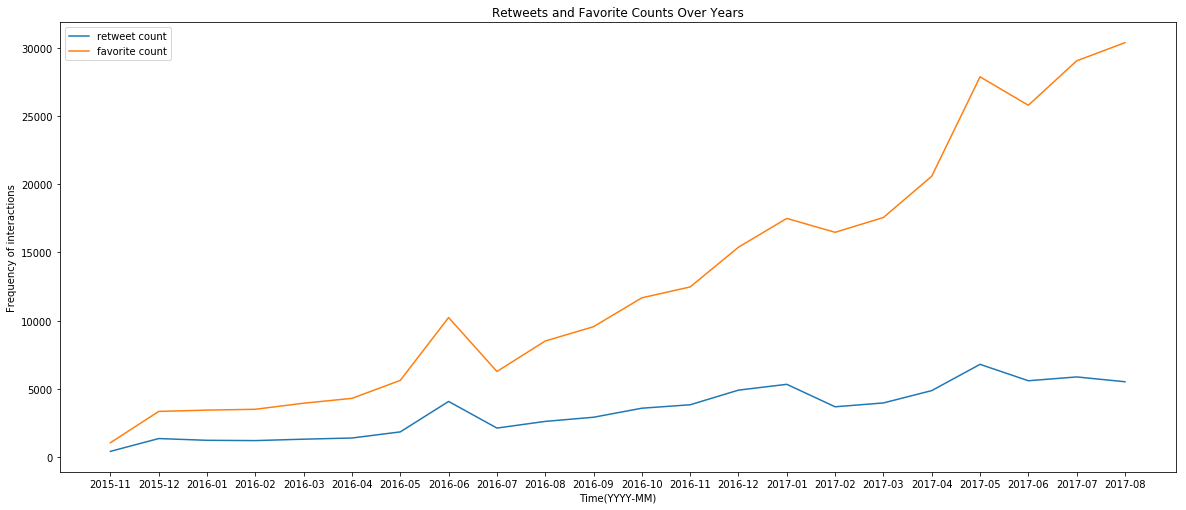

In [135]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
p1 = df_dog_true.retweet_count.groupby([df_dog_true['year_month']]).mean()
p2 = df_dog_true.favorite_count.groupby([df_dog_true['year_month']]).mean()
plt.plot(p1)
plt.plot(p2)
plt.legend(('retweet count', 'favorite count'))
plt.title('Retweets and Favorite Counts Over Years')
plt.xlabel('Time(YYYY-MM)')
plt.ylabel('Frequency of interactions');

The plots of retweet and favorite counts of true classified dogs show the normal trend of ups and downs in frequency of interaction with tweets. This trend is normal, since it differs how many people were active or viewed tweets on page from time to time . Overall, this gives us insight that most people prefer liking other than retweeting tweets. It is great that they showed them some love though, no matter feature used.

### Q2: what is the classifier's accuracy of Top 10 true predictions?
[[21]](#ref_links)

In [136]:
# get the top 10 most predicted or classified dog images
images = df_master_clean.best_image.value_counts()[0:10].index.tolist()
images

['golden_retriever',
 'Labrador_retriever',
 'Pembroke',
 'Chihuahua',
 'pug',
 'toy_poodle',
 'chow',
 'Samoyed',
 'Pomeranian',
 'malamute']

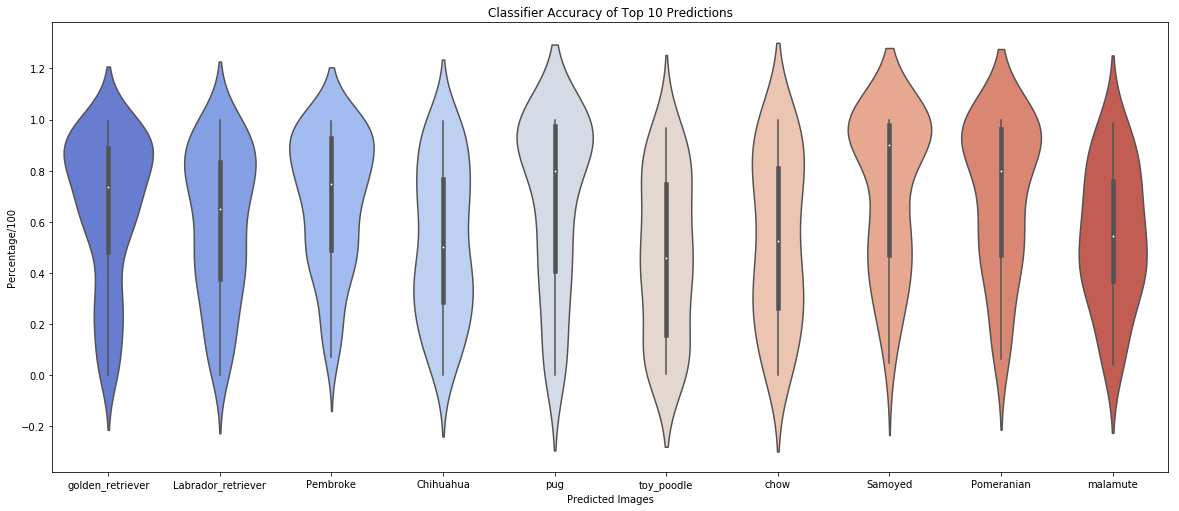

In [137]:
# take a view of top 10 images data only
df_true_pred = df_master_clean[df_master_clean.best_image.isin(images)]
# plot best confidence percentage against best predictions or images
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(x = 'best_image', y='best_confidence', data=df_true_pred, order=images, palette='coolwarm')
plt.title('Classifier Accuracy of Top 10 Predictions')
plt.xlabel('Predicted Images')
plt.ylabel('Percentage/100');

From the above plot, the classifier has accuracy percentages 50%+ as indicated from median(white dot) in each box plot.
The probability densisty feature,that violin plot provides, gives deeper insight about current and future measured data. The first prediction as an example :The golden_retriever has its interquartile range between 50% and 90 % with median about 74%. Also, The distribution shows the probability of having wide range of values around 85% to 90% accuracy, but we shouldn't ignore the probability of having low accuracy values too which is below median. In toy_poodle, we have equal probability of having high and low accuracy classification percentages to passed data. In malamute, the probability of wide range of values is expected around 40 to 48 %.The plot overall shows us we need to revisit the classifier algorithm for more enhancement.

### Q3: how are dog stages classified for the top 10 predictions?
[[22, 23]](#ref_links)

In [138]:
df_true_stage = df_true_pred.loc[:,('best_image', 'dog_stage')]
df_true_stage = df_true_stage.query('dog_stage != "None"')
df_true_stage.best_image = df_true_stage.best_image.astype('category')
df_true_stage.best_image.cat.set_categories(images, inplace=True)

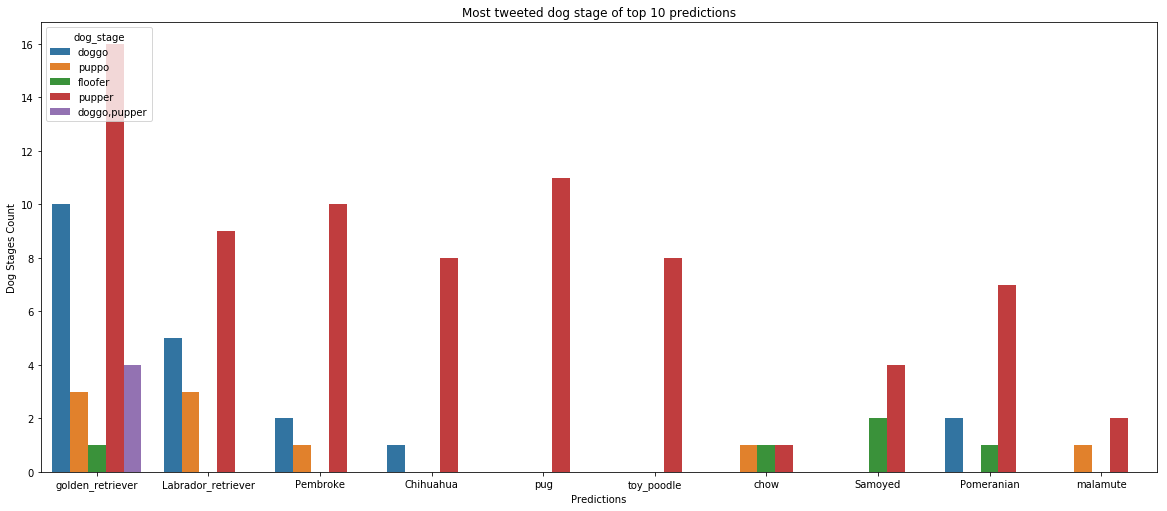

In [139]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.countplot(x='best_image', hue='dog_stage', data=df_true_stage);
plt.title('Most tweeted dog stage of top 10 predictions');
plt.xlabel('Predictions')
plt.ylabel('Dog Stages Count');

As inferred from the above bar plot, peoply mostly show love to send dogs pictures when dogs are in pupper stage; doggo comes next. Also since puppo is the stage between pupper and doggo, some go for specifying their dogs as pupper and doggo.

### Q4: what are the ratings of the top 10 predictions?
[[22, 24]](#ref_links)

In [140]:
df_true_ratings = df_true_pred.loc[:,('best_image', 'numeratorof10')]
df_true_ratings.best_image = df_true_ratings.best_image.astype('category')
df_true_ratings.best_image.cat.set_categories(images, inplace=True)

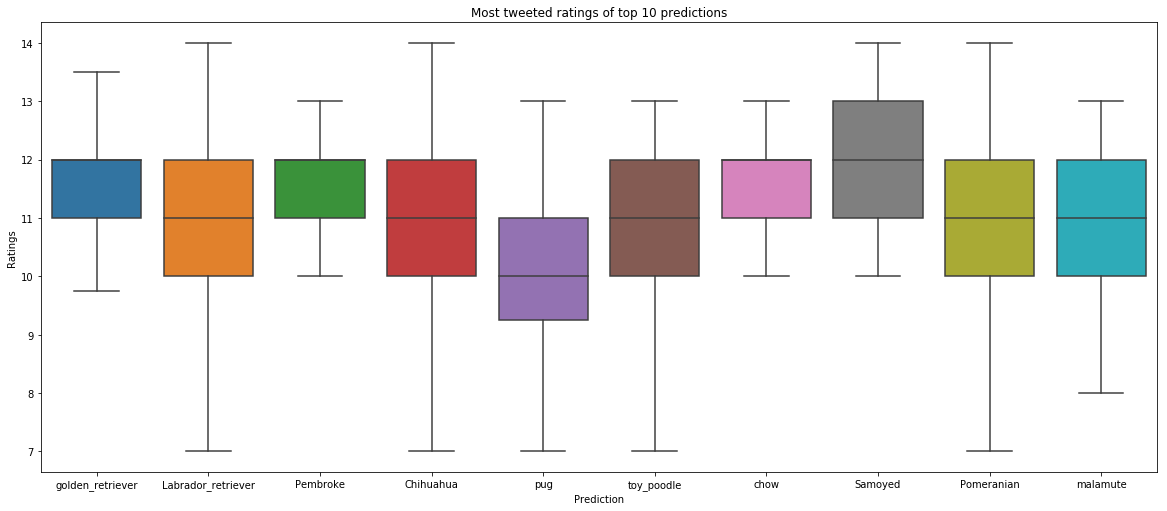

In [141]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x='best_image', y='numeratorof10', data=df_true_ratings, showfliers=False)
plt.title('Most tweeted ratings of top 10 predictions')
plt.xlabel('Prediction')
plt.ylabel('Ratings');

 As inferred from sample boxplot above, The ratings range from 7 to 14 for most data.

### Q5: do we have any out of range ratings in tweets?
[[24, 25]](#ref_links)

In [142]:
df_true_pred.query('numeratorof10 < 10').best_image.value_counts().to_frame()

,best_image
Chihuahua,21
pug,16
Labrador_retriever,9
golden_retriever,9
toy_poodle,7
Pembroke,6
malamute,3
chow,2
Pomeranian,2
Samoyed,1


In [143]:
df_true_pred.query('numeratorof10 >15').best_image.value_counts().to_frame()

,best_image
Pomeranian,1


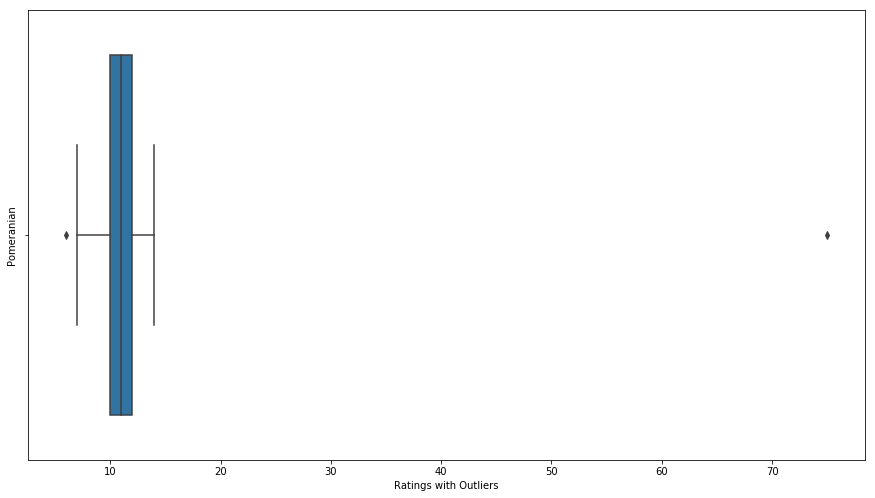

In [144]:
df_c_true = df_master_clean.query('best_image == "Pomeranian"')
a4_dims = (15, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x=df_c_true.numeratorof10, ax=ax)
plt.ylabel('Pomeranian')
plt.xlabel('Ratings with Outliers');

Yes! There are low ratings, less than 10, of 5, 6, 7 as well as high ratings of 15 and more.

### Q6:  what are the max 5 ratings with their prediction or classification values?
[[26]](#ref_links)

In [145]:
df_master_clean.nlargest(5, ['numeratorof10'])

,tweet_id,tweet_timestamp,tweet_text,tweet_url,dog_name,numeratorof10,dog_stage,tweet_img_url,favorite_count,retweet_count,is_dog,best_confidence,best_image
721,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,Atticus,1776.0,None,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,4956,2386,False,0.533941,bow_tie
1695,670842764863651840,2015-11-29 05:52:33,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,None,420.0,None,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,22990,7996,False,0.096063,microphone
320,820690176645140481,2017-01-15 17:52:40,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,None,84.0,None,https://pbs.twimg.com/media/C2OtWr0VQAEnS9r.jpg,12025,3155,True,0.872064,West_Highland_white_terrier
498,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,Logan,75.0,None,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,18032,6018,True,0.467321,Pomeranian
548,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,Sophie,27.0,pupper,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,6441,1568,True,0.946718,clumber


Rating 1776/10 is a dog. We really missed this cutie in our true prediction dogs.<br>
<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg" alt="Twitter Page" title="WeRateDogs Twitter page" /><br>
Other 4 max values are classified correctly.

#### Quick Summary of random selections from archive data:

* Bruce has Three dogs tweets. Bruce was classified correctly for https://twitter.com/dog_rates/status/790277117346975746 and https://twitter.com/dog_rates/status/761334018830917632 , but incorrectly classified for https://twitter.com/dog_rates/status/679854723806179328. This is logic for classifier to get perplexed in last link, this dog is rare really.<br>
* by name https://twitter.com/dog_rates/status/680085611152338944/photo/1 which is replaced with None has classification False for three predictions. <br>
* Zara has False classification in third prediction. How did the classifier get tennis ball? I think because the ground is green and resembles that of tennis ball one and the sandal just confused the classifier.
* Milo has https://twitter.com/dog_rates/status/754482103782404096 not classified correctly due to dog not clear in image.

* For quite name replaced with None, there are two tweets not a dog. https://twitter.com/dog_rates/status/859196978902773760 is a polar bear, and has classfication true dog for prediction 2 but false for 1 and 3. https://twitter.com/dog_rates/status/666411507551481857 is a fish and has classification with 3 false dogs which is correct.<br>
* Stanley https://twitter.com/dog_rates/status/704113298707505153 has classification all false. This also shows the classifier is correct with Stanley, because while it is swimming. it resembles a sea dog.<br>
* Winston https://twitter.com/dog_rates/status/711968124745228288 is a dog face in cup of coffee, so classifier is correct no dog should be predicted
* Ozzie was trapped in festive look that it became unclear to classifier , so it got only one prediction correct which is third prediction https://twitter.com/dog_rates/status/680959110691590145 <br>
* Sunshine https://twitter.com/dog_rates/status/834167344700198914 resembles a donkey. Classifier classified correctly false dogs for three predictions.
* None https://twitter.com/dog_rates/status/673240798075449344  is a fish not a dog , but the classifier got dogs in prediction 1 and 3.<br>
* https://twitter.com/dog_rates/status/672591271085670400 is a group of puppies in a car,but the classifier got the three classifications wrong. No one is a dog.<br>
* https://twitter.com/dog_rates/status/673576835670777856 is a person wearing a custom dog and taking selfie. Classifier got close predictions in three which are not dogs.<br>
* https://twitter.com/dog_rates/status/703407252292673536 is a dog but classified wrong in three classifications. I think because the picture has other items dominating the dog.	 

<a id = 'ref_links'></a>
## References:

[1] Markdown Cells:<br>
https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook <br>
https://www.tutorialspoint.com/jupyter/jupyter_notebook_markdown_cells.htm <br>
https://www.ibm.com/support/knowledgecenter/en/SSGNPV_2.0.0/dsx/markd-jupyter.html <br>
https://www.ibm.com/support/knowledgecenter/en/SSGNPV_2.0.0/dsx/parts-of-a-notebook.html <br>
https://blogs.baruch.cuny.edu/cis3100/?p=52 <br>
[2] Tab Completion:<br>
https://stackoverflow.com/questions/33665039/tab-completion-does-not-work-in-jupyter-notebook-but-fine-in-ipython-terminal<br>
[3] Pandas read_csv function:<br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html <br>
https://www.geeksforgeeks.org/python-read-csv-using-pandas-read_csv/ <br>
https://stackabuse.com/reading-and-writing-csv-files-in-python-with-pandas/ <br>
[4] Python request library: <br>
https://www.geeksforgeeks.org/get-post-requests-using-python/ <br>
https://www.edureka.co/blog/python-requests-tutorial/ <br>
[5] Pandas read_csv function with sep (sep = '\t' for TSV file): <br>
https://www.geeksforgeeks.org/how-to-read-a-csv-file-to-a-dataframe-with-custom-delimiter-in-pandas/ <br>
[6] Twitter tweepy library to  query Twitter API for additional data: <br>
https://docs.tweepy.org/en/v3.2.0/api.html#API <br>
https://programtalk.com/python-examples/tweepy.parsers.JSONParser/ <br>
https://www.geeksforgeeks.org/python-status-object-in-tweepy/ <br>
https://www.geeksforgeeks.org/python-api-get_status-in-tweepy/ <br>
https://jira.mongodb.org/secure/attachment/128305/collect.py <br>
[7] Read and write JSON data: <br>
https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/ <br>
https://www.geeksforgeeks.org/read-json-file-using-python/ <br>
[8] Loading JSON to dataframe using pandas: <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html <br>
https://www.geeksforgeeks.org/pandas-parsing-json-dataset/ <br>
[9] Drop rows and column based on value or condition <br>
https://www.geeksforgeeks.org/how-to-drop-rows-in-dataframe-by-conditions-on-column-values/ <br>
[10.1] Tweet's data dictionary: the objects Twitter saves from tweets <br>
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/tweet <br>
[10.2] Twitter IDs recommended type: <br>
https://developer.twitter.com/en/docs/twitter-ids <br>
[11] Change timestamp to datetime: <br>
https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/ <br>
[12] Reset index column: <br>
https://datatofish.com/reset-index-pandas-dataframe/ <br>
[13] Replace empty string columns with na using regex<br>
https://www.codegrepper.com/code-examples/python/replace+empty+cells+with+na+in+pandas <br>
[14] Round float value to two decimal places: <br>
https://stackoverflow.com/questions/25272024/round-each-number-in-a-python-pandas-data-frame-by-2-decimals <br>
[15] Remove any duplicate urls occurring after ',' using regex: <br>
https://stackoverflow.com/questions/24399820/expression-to-remove-url-links-from-twitter-tweet <br>
[16] Replace specific value(s) in column with another value(s): <br>
https://www.geeksforgeeks.org/python-pandas-dataframe-replace/ <br>
[17] Merge different dataframes into one: <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html <br>
[18] Drop all columns except needed ones: <br>
https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones <br>
[19] Iterate over rows in dataframe: <br>
https://www.geeksforgeeks.org/different-ways-to-iterate-over-rows-in-pandas-dataframe/ <br>
https://www.geeksforgeeks.org/apply-a-function-to-each-row-or-column-in-dataframe-using-pandas-apply/<br>
[20] matplotlib lineplot and Seaborn lineplot(from 0.11 + new version packages only) <br>
https://stackabuse.com/matplotlib-line-plot-tutorial-and-examples/ <br>
https://stackabuse.com/add-a-legend-to-figure-in-matplotlib/<br>
https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/#:~:text=A%20legend%20is%20an%20area,best%E2%80%9D%20(upper%20left).<br>
https://dfrieds.com/data-analysis/create-year-month-column.html <br>
https://pandas.pydata.org/pandas-docs/version/0.25.0/reference/api/pandas.DataFrame.sort_values.html <br>
https://www.geeksforgeeks.org/seaborn-lineplot-method-in-python/ <br>
https://www.geeksforgeeks.org/lineplot-using-seaborn-in-python/ <br>
https://stackoverflow.com/questions/52308749/how-do-i-create-a-multiline-plot-using-seaborn <br>
[21] Seaborn violinplot: <br>
https://en.wikipedia.org/wiki/Kernel_density_estimation <br>
https://mode.com/blog/violin-plot-examples/ <br>
https://www.geeksforgeeks.org/violin-plot-for-data-analysis/ <br>
https://stackabuse.com/matplotlib-violin-plot-tutorial-and-examples/ <br>
https://stackabuse.com/seaborn-violin-plot-tutorial-and-examples/ <br>
[22] Sorting by custom list in pandas: <br>
https://stackoverflow.com/questions/23482668/sorting-by-a-custom-list-in-pandas <br>
    Returning a view versus copy: <br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy <br>
[23] Seaborn barplot and countplot: <br>
https://www.geeksforgeeks.org/barplot-using-seaborn-in-python/ <br>
https://stackabuse.com/seaborn-bar-plot-tutorial-and-examples/ <br>
https://stackabuse.com/matplotlib-bar-plot-tutorial-and-examples/ <br>
https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py <br>
https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/ <br>
https://www.geeksforgeeks.org/seaborn-style-and-color/ <br>
https://seaborn.pydata.org/tutorial/color_palettes.html <br>
[24] Seaborn boxplot: <br>
https://stackabuse.com/seaborn-box-plot-tutorial-and-examples/ <br>
https://www.geeksforgeeks.org/box-plot-visualization-with-pandas-and-seaborn/ <br>
https://www.geeksforgeeks.org/boxplot-using-seaborn-in-python/ <br>
https://www.mikulskibartosz.name/how-to-remove-outliers-from-seaborn-boxplot-charts/ <br>
[25] Convert value_counts() output to frame: <br>
https://re-thought.com/pandas-value_counts/ <br>
[26] Get nlargest value from particular column: <br>
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nlargest.html <br>
https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/ <br>